# General Feature Extraction

In [ ]:
# pip install -U spacy
# pip install -U spacy-lookups-data
# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg

In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
df=pd.read_csv('train.csv')

#df2=pd.read_csv('train.csv')
df.head() 

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...


In [ ]:
df_test = pd.read_csv('test_samples.csv')
df_test.head()

,tweet_id,tweet_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,"Excuse the connectivity of this live stream, f..."


In [ ]:
# df=df[[5,0]]
# df.columns=['tweet_text','sentiment']
# df.head()

In [ ]:
df['sentiment'].value_counts()


positive    9064
neutral     9014
negative    3387
Name: sentiment, dtype: int64

In [ ]:
df['word_counts']=df['tweet_text'].apply(lambda x: len(str(x).split()))
df.head()

,tweet_id,sentiment,tweet_text,word_counts
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21


In [ ]:
df['char_counts']=df['tweet_text'].apply(lambda x: len(x))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14,70
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14,81
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16,90
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22,135
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21,143


In [ ]:
# Average Word Length
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len +len(word)
    return word_len/len(words)

df['avg_word_len']=df['tweet_text'].apply(lambda x: get_avg_word_len(x))

In [ ]:
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14,70,4.071429
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14,81,4.857143
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16,90,4.687500
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22,135,5.181818
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21,143,5.857143


In [ ]:
print(STOP_WORDS)

{'using', 'herein', 'regarding', 'n‘t', 'where', 'by', '‘m', 'almost', 'can', 'but', 'ten', 'thence', 'hers', 'that', 'thru', 'front', 'hereupon', 'used', 'down', 'yourselves', 'yourself', 'beforehand', 'whole', 'amount', '’ll', 'only', "'ve", 'somehow', 'whereafter', 'behind', 'itself', 'upon', 'whither', 'five', 'why', 'sometimes', 'fifteen', 'too', 'became', 'has', 'her', 'wherein', 'move', 'another', 'former', 'moreover', 'rather', 'so', 'them', 'namely', 'thereby', 'to', "n't", 'never', 'throughout', 'six', '‘re', 'next', 'during', 'always', 'it', 'neither', 'not', 'via', 'become', 'you', 'serious', '’m', 'go', 'than', 'anyway', 'without', 'made', 'is', 'for', 'between', 'below', 'again', 'herself', 'one', 'please', 'fifty', 'afterwards', 'my', 'two', 'with', 'else', 'have', 'if', 'may', 'doing', 'should', 'the', 'up', 'had', 'since', 'everyone', 'on', '‘d', 'cannot', 'somewhere', 'themselves', 'mostly', 'top', 'as', 'then', 'this', 'are', 'does', 'above', 'someone', 'less', 'back

In [ ]:
df['stop_words_len'] =df['tweet_text'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14,70,4.071429,4
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14,81,4.857143,6
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16,90,4.687500,7
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22,135,5.181818,7
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21,143,5.857143,4


In [ ]:
#Count #HashTags and @Mentions
df['hashtags_count'] = df['tweet_text'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_ count'] = df['tweet_text'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14,70,4.071429,4,0,0
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14,81,4.857143,6,0,0
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16,90,4.687500,7,0,0
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22,135,5.181818,7,0,0
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21,143,5.857143,4,0,1


In [ ]:
###if numeric digit is present in tweet_text
df['numeric_count']=df['tweet_text'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14,70,4.071429,4,0,0,0
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14,81,4.857143,6,0,0,0
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16,90,4.687500,7,0,0,0
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22,135,5.181818,7,0,0,0
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21,143,5.857143,4,0,1,0


In [ ]:
#upper case words count
df['upper_counts'] = df['tweet_text'].apply(lambda x: len([t for t in x.split() if t.isupper()]))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21,143,5.857143,4,0,1,0,0


# Preprocessing and Cleaning


In [ ]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: x.lower())

In [ ]:
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas by my house hit $3.39!!!! i\u2019m going t...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott is still shit\u002c watch rafa an...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that i\u2019m a gsp fan\u002c i just h...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israel\u2019s iron dome c...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehran\u002c mon amour: obama tried to establi...,21,143,5.857143,4,0,1,0,0


In [ ]:
contractions = {
"ain't": "am not",    
"aren't": "are not",
"can't": "cannot",
"can't have": "cannot have",
"'cause":"because",
"could've": "could have",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"musn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": "you",
" ur ": "your",
" n ": "and",
}

In [ ]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  else:
    return x

In [ ]:
import re

In [ ]:
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas by my house hit $3.39!!!! i\u2019m going t...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott is still shit\u002c watch rafa an...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that i\u2019m a gsp fan\u002c i just h...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israel\u2019s iron dome c...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehran\u002c mon amour: obama tried to establi...,21,143,5.857143,4,0,1,0,0


In [ ]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',"",x))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas by my house hit $3.39!!!! i\u2019m going t...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott is still shit\u002c watch rafa an...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that i\u2019m a gsp fan\u002c i just h...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israel\u2019s iron dome c...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehran\u002c mon amour: obama tried to establi...,21,143,5.857143,4,0,1,0,0


In [ ]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"", x)) 
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas by my house hit $3.39!!!! i\u2019m going t...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott is still shit\u002c watch rafa an...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that i\u2019m a gsp fan\u002c i just h...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israel\u2019s iron dome c...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehran\u002c mon amour: obama tried to establi...,21,143,5.857143,4,0,1,0,0


In [ ]:
df['tweet_text']=df['tweet_text'].apply(lambda x: re.sub('RT',"",x))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas by my house hit $3.39!!!! i\u2019m going t...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott is still shit\u002c watch rafa an...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that i\u2019m a gsp fan\u002c i just h...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israel\u2019s iron dome c...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehran\u002c mon amour: obama tried to establi...,21,143,5.857143,4,0,1,0,0


In [ ]:
df['tweet_text']=df['tweet_text'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))
df['tweet_text']=df['tweet_text'].apply(lambda x: re.sub('[0-9]', '', x))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas by my house hit ium going to chapel hill ...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott is still shituc watch rafa and jo...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that ium a gsp fanuc i just hate nick ...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israelus iron dome canut ...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama tried to establish ti...,21,143,5.857143,4,0,1,0,0


In [ ]:
# abc= pd.DataFrame(dfr['tweet_text'])
# abc['tweet_text']=abc['tweet_text'].apply(lambda x: re.sub('[0-9]', '', x))
# abc.head()

In [ ]:
df['tweet_text']=df['tweet_text'].apply(lambda x: " ".join(x.split()))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas by my house hit ium going to chapel hill o...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott is still shituc watch rafa and jo...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that ium a gsp fanuc i just hate nick ...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israelus iron dome canut ...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama tried to establish ti...,21,143,5.857143,4,0,1,0,0


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
df['tweet_text']=df['tweet_text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas by my house hit ium going to chapel hill o...,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott is still shituc watch rafa and jo...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,its not that ium a gsp fanuc i just hate nick ...,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israelus iron dome canut ...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama tried to establish ti...,21,143,5.857143,4,0,1,0,0


In [ ]:
import unicodedata

In [ ]:
def remove_accented_chars(x):
  x = unicodedata.normalized('NFKD', x).encode('ascii', 'ignore').decode('utf-8','ignore')
  return x

In [ ]:
import spacy

In [ ]:
df['tweet_text']=df['tweet_text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium going chapel hill sat,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott shituc watch rafa johnny deal sat...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,ium gsp fanuc hate nick diaz canut wait february,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general says israelus iron dome canut ...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama tried establish ties ...,21,143,5.857143,4,0,1,0,0


In [ ]:
#df2.head()

In [ ]:
nlp = spacy.load('en_core_web_sm')
#DOWNLOAD THIS FIRST

In [ ]:
#5 min
def make_to_base(x):
  x_list = []
  doc = nlp(x)

  for token in doc:
    lemma = str(token.lemma_)
    if lemma == '-PRON-' or lemma == 'be':
      lemma = token.text
    x_list.append(lemma)

  return (" ".join(x_list))

#DIDN'T APPLY THIS TO THE DATAFRAME SAYING THAT IT WILL TAKE ALOT OF TIME IF THE DATASET IS HUGE
#CAN BE APPLIED USING THE LAMBDA FUNCTION
#Maybe it can be applied like this:-


df['tweet_text']=df['tweet_text'].apply(lambda x: make_to_base(x))



In [ ]:
df.head()


,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium go chapel hill sit,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott shituc watch rafa johnny deal sat...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,ium gsp fanuc hate nick diaz canut wait february,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general say israelus iron dome canut d...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama try establish tie mul...,21,143,5.857143,4,0,1,0,0


In [ ]:
# t=df.iloc[0,2]
#print(make_to_base(t))

In [ ]:
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium go chapel hill sit,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott shituc watch rafa johnny deal sat...,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,ium gsp fanuc hate nick diaz canut wait february,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general say israelus iron dome canut d...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama try establish tie mul...,21,143,5.857143,4,0,1,0,0


In [ ]:
text = ' '.join(df['tweet_text'])

In [ ]:
text = text.split()

In [ ]:
freq_comm = pd.Series(text).value_counts()

In [ ]:
f20 = freq_comm[:20] #CHECK THIS PART ONCE AGAIN

In [ ]:
df['tweet_text']=df['tweet_text'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium chapel hill sit,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott shituc rafa johnny deal,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,ium gsp fanuc hate nick diaz canut wait february,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general say israelus iron dome canut d...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama try establish tie mul...,21,143,5.857143,4,0,1,0,0


In [ ]:
rare20 = freq_comm[-20:] #CHECK THIS PART ONCE AGAIN AT 1:30:10
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium chapel hill sit,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott shituc rafa johnny deal,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,ium gsp fanuc hate nick diaz canut wait february,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general say israelus iron dome canut d...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama try establish tie mul...,21,143,5.857143,4,0,1,0,0


In [ ]:
#rare = freq_comm[freq_comm.values == 1]
#DIDN'T USE THIS AS IT WILL TAKE TIME AS THE DATA SET IS BIG
#WE CAN USE IT AS:

#df['tweet_text']=df['tweet_text'].apply(lambda x: " ".join([t for t in x.split() if t not in rare]))

In [ ]:


df['tweet_text']=df['tweet_text'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium chapel hill sit,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott shituc rafa johnny deal,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,ium gsp fanuc hate nick diaz canut wait february,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general say israelus iron dome canut d...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama try establish tie mul...,21,143,5.857143,4,0,1,0,0


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = ' '.join(text)

In [ ]:
len(text)

240987

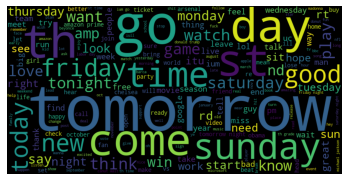

In [ ]:
wc = WordCloud(width = 800, height = 400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
df_new = df.iloc[0:15,:]
df_new['tweet_text']= df_new['tweet_text'].apply(lambda x: " ".join(x))
df_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium chapel hill sit,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott shituc rafa johnny deal,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,ium gsp fanuc hate nick diaz canut wait february,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general say israelus iron dome canut d...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama try establish tie mul...,21,143,5.857143,4,0,1,0,0
5,264229576773861376,neutral,sat movie harry ron christmas ohlawd,14,74,4.357143,7,0,0,0,1
6,264105751826538497,positive,j davlar main rival team poland hopefully succ...,24,127,4.333333,10,0,0,0,1
7,264094586689953794,negative,talk actus satusuc decide want collegeuc apply...,23,156,5.826087,10,0,0,0,1
8,212392538055778304,neutral,happy valentines trending itus february june smh,17,100,4.941176,6,0,0,0,0
9,254941790757601280,negative,superbowl dallasuc dallas ainut win superbowl ...,21,143,5.857143,9,0,2,0,1


In [ ]:
from textblob import TextBlob

In [ ]:
# #TAKES 50MINS
# type(x)
# df['tweet_text']=df.iloc[:,2].apply(lambda x: str(TextBlob(x).correct()))
tb = Blobber(analyzer=NaiveBayesAnalyzer())
abc=df_new.iloc[0:10,2].apply(lambda x: str(TextBlob(x).correct()))
abc

0                    gas house hit sum chapel hill sit
1                    the walcott situ raft johnny deal
2     sum gap fancy hate nick diaz canst wait february
3    italian general say israel iron dome canst dea...
4    tehranuc mon amour drama try establish tie mil...
5                  sat movie harry on christmas ohlawd
6    j dollar main rival team poland hopefully succ...
7    talk acts satusuc decide want college apply co...
8         happy valentine treading its february june s
9    superbowl dallas dallas about win superbowl qu...
Name: tweet_text, dtype: object

In [ ]:
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium chapel hill sit,14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,theo walcott shituc rafa johnny deal,14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,ium gsp fanuc hate nick diaz canut wait february,16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,iranian general say israelus iron dome canut d...,22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,tehranuc mon amour obama try establish tie mul...,21,143,5.857143,4,0,1,0,0


In [ ]:
df['tweet_text']=df['tweet_text'].apply(lambda x: TextBlob(str(x)).words)
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,"[gas, house, hit, ium, chapel, hill, sit]",14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,"[theo, walcott, shituc, rafa, johnny, deal]",14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,"[ium, gsp, fanuc, hate, nick, diaz, canut, wai...",16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,"[iranian, general, say, israelus, iron, dome, ...",22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,"[tehranuc, mon, amour, obama, try, establish, ...",21,143,5.857143,4,0,1,0,0


In [ ]:
df2=df.iloc[:,:]
df2.shape



(21465, 11)

In [ ]:
#6mins
# def lemmatize_best(x):
#   doc = nlp(str(x))
#   lem = []
#   for token in doc:
#     lem.append(token.lemma_)
#   STR = ''.join(lem)
#   return STR

# df['tweet_text']=df['tweet_text'].apply(lambda x: lemmatize_best(x))
#df.head()

# Advanced text processing and feature extraction

In [ ]:
# #N-Grams
# # tb = TextBlob(str(x))
# # tb.ngrams(3)
# type('tweet_text')
# print(df['tweet_text'])

In [ ]:
# #Bag of Words
# from sklearn.feature_extraction.text import CountVectorizer

# #tweet_text = np.nan_to_num(tweet_text)


# cv = CountVectorizer(ngram_range=(1,1))
# x=df2.iloc[:2]
# text_counts= cv.fit_transform(x)
# #text_counts #sparse matrix
# x

In [ ]:
# df2.head()

In [ ]:
# text_counts.toarray() #to get array

In [ ]:
# cv.get_feature_names() #imp names

In [ ]:
# bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())
# bow

In [ ]:
# #Tm Frequency
# tf = bow.copy()

In [ ]:
# TAKES TIME TO EXECUTE
# for index, row in enumerate(tf.iterrows()):
#   for col in row[1].index:
#     tf.loc[index,col] = tf.loc[index,col]/sum(row[1].values)
# tf
# #tf is normalised form of bag of words

In [ ]:
#Inverse Document Frequency

# import numpy as np

#x_df = pd.DataFrame(df, columns=['words'])  #INSTEAD OF DF X WAS WRITTEN

# N = bow.shape[0]

# bb = bow.astype('bool')
# cols = bb.columns
# nz=[]

# for col in cols:
#   nz.append(bb[col].sum())

# idf=[]
# for index, col in enumerate(cols):
#   idf.append( np.log((N + 1)/(nz[index] + 1)) + 1 )

# idf

In [ ]:
#x_df['words'].apply(str)
#x_df['words'] = x_df['words'].apply(str)
# type(x_df['words'][0])

In [ ]:
df2.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,"[gas, house, hit, ium, chapel, hill, sit]",14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,"[theo, walcott, shituc, rafa, johnny, deal]",14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,"[ium, gsp, fanuc, hate, nick, diaz, canut, wai...",16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,"[iranian, general, say, israelus, iron, dome, ...",22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,"[tehranuc, mon, amour, obama, try, establish, ...",21,143,5.857143,4,0,1,0,0


In [ ]:
# #TFIDF #direct code
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
# x_tfidf = tfidf.fit_transform(x_df['words'])
# x_tfidf.toarray()

In [ ]:
# #Word embeddings
# #Spacy 'Word2Vec'
# # !python -m spacy download en_core_web_lg
# nlp = spacy.load('en_core_web_lg')

# ML models for text classification

In [ ]:
df.head()

,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,"[gas, house, hit, ium, chapel, hill, sit]",14,70,4.071429,4,0,0,0,0
1,263405084770172928,negative,"[theo, walcott, shituc, rafa, johnny, deal]",14,81,4.857143,6,0,0,0,0
2,262163168678248449,negative,"[ium, gsp, fanuc, hate, nick, diaz, canut, wai...",16,90,4.687500,7,0,0,0,1
3,264249301910310912,negative,"[iranian, general, say, israelus, iron, dome, ...",22,135,5.181818,7,0,0,0,0
4,262682041215234048,neutral,"[tehranuc, mon, amour, obama, try, establish, ...",21,143,5.857143,4,0,1,0,0


In [ ]:
df.shape      

(21465, 11)

In [ ]:
df0=df[df['sentiment']=='positive']

In [ ]:
# df.iloc[0:4000,1]=4
df2=df[df['sentiment']=='neutral']

In [ ]:
df4=df[df['sentiment']=='negative']

In [ ]:
dfr=df0.append(df4)
dfr=dfr.append(df2)

In [ ]:
dfr.columns
dfr.size

236115

In [ ]:
dfr['tweet_text'] = dfr['tweet_text'].apply(lambda x: " ".join(x)) 
dfr.head()


,tweet_id,sentiment,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,positive,gas house hit ium chapel hill sit,14,70,4.071429,4,0,0,0,0
6,264105751826538497,positive,j davlar main rival team poland hopefully succ...,24,127,4.333333,10,0,0,0,1
12,263398998675693568,positive,oluoch victorotti kunjand sridevius comeback u...,20,129,5.500000,5,0,3,0,3
13,263650552167157762,positive,grader kory excite touchdown today victor cruzlol,19,120,5.368421,7,0,0,0,0
15,264087629237202944,positive,msshelahy do want pop yep chapel hill wednesda...,27,140,4.222222,11,0,1,0,1


In [ ]:
dfr_feat=dfr.drop(labels=['tweet_text', 'sentiment'], axis=1)


In [ ]:
dfr_feat.head()

,tweet_id,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,14,70,4.071429,4,0,0,0,0
6,264105751826538497,24,127,4.333333,10,0,0,0,1
12,263398998675693568,20,129,5.500000,5,0,3,0,3
13,263650552167157762,19,120,5.368421,7,0,0,0,0
15,264087629237202944,27,140,4.222222,11,0,1,0,1


In [ ]:
y=dfr['sentiment']

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# cv=CountVectorizer()
# dfr['tweet_text'] = np.nan_to_num(dfr['tweet_text'])
# text_counts=cv.fit_transform(str(dfr['tweet_text']))
# # type

In [ ]:
# #text.counts.toarray()
# dfr_bog=pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
# dfr_bog.head()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler 

In [ ]:
sgd=SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr=LogisticRegression(random_state=42, max_iter=200)
lgrcv=LogisticRegressionCV(cv=2, random_state=42, max_iter=1000)
svm=LinearSVC(random_state=42, max_iter=200)
rfc=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
clf={'SGD': sgd, 'LR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC':rfc}

In [ ]:
def classify(X, y):
  #scaler=MinMaxScaler(feature_range=(0,1))
  scaler=MaxAbsScaler()
  X=scaler.fit_transform(X)

  X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)


  for key in clf.keys():
    clf[key].fit(X_train, y_train)

    y_pred=clf[key].predict(X_test)
    ac=accuracy_score(y_test, y_pred)

    print(key, "---------->", ac)

In [ ]:
# # %%time
# classify(dfr_bog, y)


In [ ]:
# dfr_feat.head()

In [ ]:
%%time
classify(dfr_feat, y)

SGD ----------> 0.45236431399953414
LR ----------> 0.46820405310971347
LGR-CV ----------> 0.46727230375029116
SVM ----------> 0.4670393664104356
RFC ----------> 0.4630794316328907
CPU times: user 20.8 s, sys: 3.33 s, total: 24.2 s
Wall time: 16.1 s


In [ ]:
dfr_feat.head()

,tweet_id,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264183816548130816,14,70,4.071429,4,0,0,0,0
6,264105751826538497,24,127,4.333333,10,0,0,0,1
12,263398998675693568,20,129,5.500000,5,0,3,0,3
13,263650552167157762,19,120,5.368421,7,0,0,0,0
15,264087629237202944,27,140,4.222222,11,0,1,0,1


In [ ]:
# dfr_bog.head()

In [ ]:
# X=dfr_feat.join(dfr_bog)

In [ ]:
# # %%time
# X = np.nan_to_num(X)
# #X.replace({"?": np.nan, "--": np.nan}, inplace = True)
# classify(X, y)
# #X.describe

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X=tfidf.fit_transform(dfr['tweet_text'])

X.shape



(21465, 36048)

In [ ]:
%%time
#classify(X, y)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [ ]:
#scaler=MinMaxScaler(feature_range=(0,1))
scaler=MaxAbsScaler()
X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)


for key in clf.keys():
  clf[key].fit(X_train, y_train)

  y_pred=clf[key].predict(X_test)
  ac=accuracy_score(y_test, y_pred)

  print(key, "---------->", ac)

SGD ----------> 0.6030747728860937
LR ----------> 0.6077335196832052
LGR-CV ----------> 0.618914511996273
SVM ----------> 0.5828092243186582
RFC ----------> 0.6186815746564174


In [ ]:
# #8 mins
# def get_vec(x):
#   doc = nlp(x)
#   return doc.vector.reshape(1, -1)


# # %%time
# dfr['vec']=dfr['tweet_text'].apply(lambda x: get_vec(x))

# X=np.concatenate(dfr['vec'].to_numpy(), axis=0)
# classify(pd.DataFrame(X), y)

In [ ]:
# X.shape

In [ ]:
# df.head()

In [ ]:
# def predict_w2v(x):
#   for key in clf.keys():
#     y_pred=clf[key].predict(get_vec(x)
#     print(key, "---->", y_pred)

In [ ]:
# df['tweet_text'].head()

In [ ]:

# predict_w2v(str(df['tweet_text'][1]))

In [ ]:
# predict_w2v(str(X))

In [ ]:
df_test['word_counts']=df_test['tweet_text'].apply(lambda x: len(str(x).split()))

In [ ]:
df_test.head()

,tweet_id,tweet_text,word_counts
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",22
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,15
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,22
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",21
4,171874368908050432,"Excuse the connectivity of this live stream, f...",21


In [ ]:
df_test['char_counts']=df_test['tweet_text'].apply(lambda x: len(x))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",22,140
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,15,87
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,22,140
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",21,140
4,171874368908050432,"Excuse the connectivity of this live stream, f...",21,135


In [ ]:
df_test['avg_word_len']=df_test['tweet_text'].apply(lambda x: get_avg_word_len(x))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",22,140,5.409091
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,15,87,4.866667
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,22,140,5.409091
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",21,140,5.714286
4,171874368908050432,"Excuse the connectivity of this live stream, f...",21,135,5.476190


In [ ]:
df_test['stop_words_len'] =df_test['tweet_text'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",22,140,5.409091,9
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,15,87,4.866667,6
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,22,140,5.409091,5
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",21,140,5.714286,3
4,171874368908050432,"Excuse the connectivity of this live stream, f...",21,135,5.476190,9


In [ ]:
df_test['hashtags_count'] = df_test['tweet_text'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df_test['mentions_ count'] = df_test['tweet_text'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",22,140,5.409091,9,0,1
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,15,87,4.866667,6,0,0
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,22,140,5.409091,5,0,0
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",21,140,5.714286,3,0,0
4,171874368908050432,"Excuse the connectivity of this live stream, f...",21,135,5.476190,9,1,0


In [ ]:
df_test['numeric_count']=df_test['tweet_text'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",22,140,5.409091,9,0,1,0
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,15,87,4.866667,6,0,0,0
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,22,140,5.409091,5,0,0,1
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",21,140,5.714286,3,0,0,0
4,171874368908050432,"Excuse the connectivity of this live stream, f...",21,135,5.476190,9,1,0,0


In [ ]:
df_test['upper_counts'] = df_test['tweet_text'].apply(lambda x: len([t for t in x.split() if t.isupper()]))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",22,140,5.409091,9,0,1,0,0
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",21,140,5.714286,3,0,0,0,0
4,171874368908050432,"Excuse the connectivity of this live stream, f...",21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text'] = df_test['tweet_text'].apply(lambda x: x.lower())
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,"@jjuueellzz down in the atlantic city, ventnor...",22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness: great big beautiful tomorro...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,on radio786 100.4fm 7:10 fri oct 19 labour ana...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,"kapan sih lo ngebuktiin,jan ngomong doang susa...",21,140,5.714286,3,0,0,0,0
4,171874368908050432,"excuse the connectivity of this live stream, f...",21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text'] = df_test['tweet_text'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',"",x))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,"@jjuueellzz down in the atlantic city, ventnor...",22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness: great big beautiful tomorro...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,on radio786 100.4fm 7:10 fri oct 19 labour ana...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,"kapan sih lo ngebuktiin,jan ngomong doang susa...",21,140,5.714286,3,0,0,0,0
4,171874368908050432,"excuse the connectivity of this live stream, f...",21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text'] = df_test['tweet_text'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"", x))
df_test.head() 

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,"@jjuueellzz down in the atlantic city, ventnor...",22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness: great big beautiful tomorro...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,on radio786 100.4fm 7:10 fri oct 19 labour ana...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,"kapan sih lo ngebuktiin,jan ngomong doang susa...",21,140,5.714286,3,0,0,0,0
4,171874368908050432,"excuse the connectivity of this live stream, f...",21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: re.sub('RT',"",x))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,"@jjuueellzz down in the atlantic city, ventnor...",22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness: great big beautiful tomorro...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,on radio786 100.4fm 7:10 fri oct 19 labour ana...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,"kapan sih lo ngebuktiin,jan ngomong doang susa...",21,140,5.714286,3,0,0,0,0
4,171874368908050432,"excuse the connectivity of this live stream, f...",21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: re.sub('[0-9]', '', x))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz down in the atlantic city ventnor m...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful tomorrow...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,on radio fm fri oct labour analyst shawn hat...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse the connectivity of this live stream fr...,21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: " ".join(x.split()))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz down in the atlantic city ventnor m...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful tomorrow...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,on radio fm fri oct labour analyst shawn hatti...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse the connectivity of this live stream fr...,21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz down in the atlantic city ventnor m...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful tomorrow...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,on radio fm fri oct labour analyst shawn hatti...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse the connectivity of this live stream fr...,21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful tomorrow...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: make_to_base(x))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful tomorrow...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
text_test = ' '.join(df_test['tweet_text'])
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful tomorrow...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
text_test = text_test.split()
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful tomorrow...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
freq_comm = pd.Series(text_test).value_counts()
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful tomorrow...,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
f20 = freq_comm[:20] #CHECK THIS PART ONCE AGAIN

In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful end,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
rare20 = freq_comm[-20:]

In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful end,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
x = ' '.join(text_test)
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful end,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text']=df_test['tweet_text'].apply(lambda x: TextBlob(str(x)).words)
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,"[jjuueellzz, atlantic, city, ventnor, margate,...",22,140,5.409091,9,0,1,0,0
1,218775148495515649,"[musical, awareness, great, big, beautiful, end]",15,87,4.866667,6,0,0,0,0
2,258965201766998017,"[radio, fm, fri, oct, labour, analyst, shawn, ...",22,140,5.409091,5,0,0,1,0
3,262926411352903682,"[kapan, sih, lo, ngebuktiinjan, ngomong, doang...",21,140,5.714286,3,0,0,0,0
4,171874368908050432,"[excuse, connectivity, live, stream, baba, amr...",21,135,5.476190,9,1,0,0,1


In [ ]:
df_test['tweet_text'] = df_test['tweet_text'].apply(lambda x: " ".join(x)) 
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful end,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
dfr_feat=df_test.drop(labels=['tweet_text'], axis=1)
df_test.head()

,tweet_id,tweet_text,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_ count,numeric_count,upper_counts
0,264238274963451904,jjuueellzz atlantic city ventnor margate ocean...,22,140,5.409091,9,0,1,0,0
1,218775148495515649,musical awareness great big beautiful end,15,87,4.866667,6,0,0,0,0
2,258965201766998017,radio fm fri oct labour analyst shawn hattingh...,22,140,5.409091,5,0,0,1,0
3,262926411352903682,kapan sih lo ngebuktiinjan ngomong doang susah...,21,140,5.714286,3,0,0,0,0
4,171874368908050432,excuse connectivity live stream baba amr activ...,21,135,5.476190,9,1,0,0,1


In [ ]:
# tfidf = TfidfVectorizer()

#X_train=tfidf.fit_transform(df_test['tweet_text'])

In [ ]:
#X_train.shape
# df_test.head()

In [ ]:
df_test.columns

Index(['tweet_id', 'tweet_text', 'word_counts', 'char_counts', 'avg_word_len',
       'stop_words_len', 'hashtags_count', 'mentions_ count', 'numeric_count',
       'upper_counts'],
      dtype='object')

In [ ]:
dfr.columns

Index(['tweet_id', 'sentiment', 'tweet_text', 'word_counts', 'char_counts',
       'avg_word_len', 'stop_words_len', 'hashtags_count', 'mentions_ count',
       'numeric_count', 'upper_counts'],
      dtype='object')

In [ ]:
# clf_temp={'SGD': sgd, 'LR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC':rfc}

In [ ]:
##scaler=MaxAbsScaler()
#X_train=scaler.fit_transform(X_train)
X_train = df_test['tweet_text']
X_train = tfidf.transform(X_train)
X_train = scaler.transform(X_train)
# X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
#clf_temp={'SGD': sgd, 'LR': lgr, 'SVM': svm, 'RFC':rfc}
pred_list=[]

for key in clf.keys():
  print(key)
  y_pred=clf[key].predict(X_train)
  pred_list.append(y_pred)
  
  print(y_pred)

SGD
['positive' 'positive' 'neutral' ... 'positive' 'positive' 'neutral']
LR
['positive' 'positive' 'neutral' ... 'positive' 'neutral' 'positive']
LGR-CV
['positive' 'positive' 'neutral' ... 'positive' 'positive' 'neutral']
SVM
['positive' 'positive' 'neutral' ... 'positive' 'neutral' 'positive']
RFC
['neutral' 'positive' 'neutral' ... 'neutral' 'positive' 'neutral']


In [ ]:
#df_test.head()
#pred_list
from google.colab import files
df_SGD = pd.DataFrame(df_test.iloc[:,0])
df_SGD['sentiment']=pred_list[0]
df_SGD.to_csv('output_SGD.csv',index=False)
files.download('output_SGD.csv')

df_LR = pd.DataFrame(df_test.iloc[:,0])
df_LR['sentiment']=pred_list[1]
df_LR.to_csv('output_LR.csv',index=False)
files.download('output_LR.csv')

df_LGRCV = pd.DataFrame(df_test.iloc[:,0])
df_LGRCV['sentiment']=pred_list[2]
df_LGRCV.to_csv('output_LGRCV.csv',index=False)
files.download('output_LGRCV.csv')

df_SVM = pd.DataFrame(df_test.iloc[:,0])
df_SVM['sentiment']=pred_list[3]
df_SVM.to_csv('output_SVM.csv',index=False)
files.download('output_SVM.csv')

df_RFC = pd.DataFrame(df_test.iloc[:,0])
df_RFC['sentiment']=pred_list[4]
df_RFC.to_csv('output_RFC.csv',index=False)
files.download('output_RFC.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>